Digital Signal Processing

Assignment #03

Group Members:

1. Navami Kairanda (Enrollment Number:2577665)
1. Pankhuri Vanjani (Enrollment Number:7009617)

In [25]:
%%html
<img src = "1b.png",width=350, height=350>

In [26]:
%%html
<img src = "1c.png",width=350, height=350>

In [27]:
%%html
<img src = "1d.png",width=350, height=350>

In [28]:
%%html
<img src = "1e.png",width=350, height=350>

In [29]:
%%html
<img src = "2a.png",width=350, height=350>

In [30]:
%%html
<img src = "2b.png",width=350, height=350>

**LPC Algorithm**

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt 
import sounddevice
from scipy.io import wavfile




3.1 Functions to compute phi and si

In [32]:
def cap_phi(signal, order):
    capmatrix = np.zeros((order,order))
    for i in range(1, order+1): #matrix of size order*order
        for j in range(1, order+1):
            samples_sum = 0
            for k in range(len(signal)):
                samples_sum += signal[k-i] * signal[k-j]
            capmatrix[i-1,j-1]+= samples_sum
    return capmatrix    

In [33]:
def sml_phi(signal, order):
    smlmatrix = np.zeros((order))
    for i in range(1, order+1):   #matrix of size order          
        samples_sum = 0
        for k in range(len(signal)):
            samples_sum += signal[k-i] * signal[k]
        smlmatrix[i-1]+= samples_sum    
    return smlmatrix

3.2 Function to compute prediction coefficient 

In [34]:
def solve_coef(signal, order): # basically solving the linear matrix equation
    capmatrix = cap_phi(signal, order)
    smlmatrix = sml_phi(signal, order)
    a = np.linalg.solve(capmatrix, smlmatrix)
    return a  

3.3 LPC on recorded audio 

In [35]:
#params for recording the 'dsp' sound 
fs = 48000
duration = 2

In [36]:
#to avoid repeated recording, the code part has been commented and wave has been saved. 
#dsp_recording = sounddevice.rec(int(duration * fs), samplerate=fs, channels=1)
#sounddevice.wait()  # Wait until recording is finished
#wavfile.write('dsp_recorded.wav', fs, dsp_recording)  # Save as WAV file 
samplerate, dsp_recording = wavfile.read('dsp_recorded.wav')


In [37]:
dsp_recording.shape

(96000,)

In [38]:
dsp_recording = dsp_recording[24000:] #for taking 72000 samples from middle (2*48000 -72000 for starting sample)


In [39]:
dsp_recording.shape

(72000,)

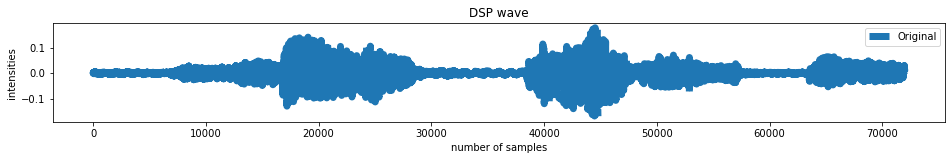

In [40]:
#plotting the signal to visualize the stored samples
fig=plt.figure(figsize=(16, 4))

plot1 = plt.subplot(2,1,1)
plot1.set_title("DSP wave")
plot1.plot(dsp_recording, linestyle="dashdot", label = "Original", linewidth = 7)

plot1.legend(loc="upper right")
plt.xlabel('number of samples')
plt.ylabel('intensities')


plt.show()

In [41]:
#playing wav file to check audio recording 
sounddevice.play(dsp_recording,fs)

In [42]:
#calculating lpc coefficients 
dsp_lpc = solve_coef(dsp_recording, 16) #order = 16


In [43]:
#printing LPC coefficients
dsp_lpc

array([ 0.76289767,  0.05188623,  0.38186791, -0.54387232,  0.64357933,
       -0.45511331,  0.51179588, -0.5628339 ,  0.34794086, -0.44667774,
        0.45950907, -0.27857781,  0.34649019, -0.14990999,  0.19723754,
       -0.30211417])

3.4 Prediction

In [44]:
def predict(signal, coefficient):
    reversed_signal = np.flip(signal) #taking  portion of signal and reversing it to get last 16 coefficients
    return (reversed_signal*coefficient).sum()
    #predicted_next = 0
    #for j in range(len(coefficient)):
    #    predicted_next += coefficient[j]*reversed_signal[j]
    #    #predicted_next += coefficient[j]*signal[j]  
    #return predicted_next


3.5 Error Calculation

In [45]:
def error_compute(signal, coefficient):   
    error = np.zeros((len(signal)))
    predicted_signal = np.zeros((len(signal))) 
    for i in range(16, len(error)):        
        if i < len(coefficient):
            error[i] = 0     
        else:
            pred = predict(signal[i-16:i],coefficient)
            error[i] = signal[i] - pred
            predicted_signal[i] = pred
    return error, predicted_signal

In [46]:
error, predicted_signal = error_compute(dsp_recording, dsp_lpc)
error

array([ 0.        ,  0.        ,  0.        , ..., -0.00034081,
       -0.00023868, -0.00030616])

In [47]:
predicted_signal.shape

(72000,)

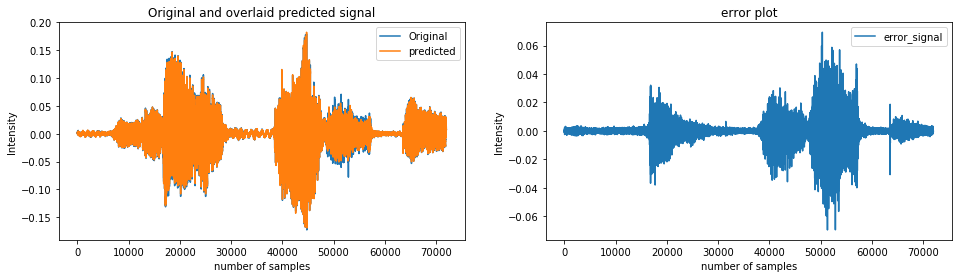

In [48]:
fig=plt.figure(figsize=(16, 4))

#plot 1 
# predicted signal overlaid on the original signal
plot1 = plt.subplot(1, 2, 1)
plot1.set_title("Original and overlaid predicted signal")
plot1.plot(dsp_recording, label = "Original")
plot1.plot(predicted_signal, label="predicted")

plot1.legend(loc="upper right")
plt.xlabel('number of samples')
plt.ylabel('Intensity')

#plot 2 prediction error
plot2 = plt.subplot(1, 2, 2)
plot2.set_title("error plot")
plot2.plot(error, label="error_signal")


plot2.legend(loc="upper right")
plt.xlabel('number of samples')
plt.ylabel('Intensity')

plt.show()